<a href="https://colab.research.google.com/github/Likith516/Development-of-Interactive-Cyber-Threat-Visualization-Dashboard/blob/main/PythonTAsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
file_path = '/content/sample_data/cyber_attack_dataset_q4_2025.csv'
df = pd.read_csv(file_path)

#Task 1: Display DataFrame Information

In [6]:
print("--- Task 1: DataFrame Information ---")
df.info()

--- Task 1: DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   attacker_ip        500 non-null    object
 1   target_ip          500 non-null    object
 2   attacker_location  500 non-null    object
 3   attack_type        500 non-null    object
 4   attack_device      500 non-null    object
 5   security_type      500 non-null    object
 6   attack_date        500 non-null    object
 7   severity           500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


#Task 2: Display First 10 Rows

In [7]:
print("\n--- Task 2: First 10 Rows ---")
display(df.head(10))


--- Task 2: First 10 Rows ---


,attacker_ip,target_ip,attacker_location,attack_type,attack_device,security_type,attack_date,severity
0,215.147.246.227,10.239.58.162,China,DDoS,IoT Sensor,Email Gateway,11/22/2025,High
1,212.188.129.154,10.67.28.139,USA,DDoS,Cloud VM,WAF,12/17/2025,Medium
2,95.255.232.209,10.11.105.179,Russia,Brute Force,Web Server,Endpoint Protection,11/8/2025,High
3,142.95.106.162,10.164.2.134,China,Credential Stuffing,Cloud VM,IDS/IPS,10/14/2025,High
4,188.3.34.96,10.201.196.119,India,Zero-day Exploit,IoT Camera,WAF,10/25/2025,Low
5,108.78.48.253,10.105.152.119,Brazil,Man-in-the-Middle,Mobile,IDS/IPS,12/15/2025,Critical
6,208.154.201.31,10.23.29.180,China,Credential Stuffing,Web Server,IDS/IPS,11/11/2025,Medium
7,74.124.248.202,10.15.23.29,Ukraine,Man-in-the-Middle,Web Server,IDS/IPS,11/25/2025,Low
8,40.1.194.121,10.51.244.158,Ukraine,Phishing,IoT Sensor,IDS/IPS,12/23/2025,Critical
9,74.99.181.136,10.40.11.180,UK,Man-in-the-Middle,IoT Camera,IDS/IPS,11/20/2025,High


#Task 3: Display Descriptive Statistics

In [8]:
print("\n--- Task 3: Descriptive Statistics ---")
display(df.describe(include='all'))


--- Task 3: Descriptive Statistics ---


,attacker_ip,target_ip,attacker_location,attack_type,attack_device,security_type,attack_date,severity
count,500,500,500,500,500,500,500,500
unique,500,500,10,8,6,6,91,4
top,39.211.160.117,10.249.11.67,China,Zero-day Exploit,Web Server,IDS/IPS,12/7/2025,Critical
freq,1,1,65,71,93,91,12,128


#Task 4: Analyze Distribution of attack_type

In [9]:
print("\n--- Task 4: Distribution of attack_type ---")
attack_type_dist = df['attack_type'].value_counts()
print(attack_type_dist)


--- Task 4: Distribution of attack_type ---
attack_type
Zero-day Exploit       71
SQL Injection          68
Phishing               67
Man-in-the-Middle      64
Brute Force            61
Credential Stuffing    59
DDoS                   58
Ransomware             52
Name: count, dtype: int64


#Task 5: Identify Unique Values in Key Categorical Columns

In [10]:
print("\n--- Task 5: Unique Values ---")
cols_to_check = ['attack_type', 'attack_device', 'security_type', 'severity']
for col in cols_to_check:
    print(f"{col}: {df[col].unique()}")


--- Task 5: Unique Values ---
attack_type: ['DDoS' 'Brute Force' 'Credential Stuffing' 'Zero-day Exploit'
 'Man-in-the-Middle' 'Phishing' 'Ransomware' 'SQL Injection']
attack_device: ['IoT Sensor' 'Cloud VM' 'Web Server' 'IoT Camera' 'Mobile' 'Server']
security_type: ['Email Gateway' 'WAF' 'Endpoint Protection' 'IDS/IPS' 'Firewall'
 'Zero Trust']
severity: ['High' 'Medium' 'Low' 'Critical']


#Task 6: Analyze Severity Distribution

In [11]:
print("\n--- Task 6: Severity Distribution ---")
severity_dist = df['severity'].value_counts()
print(severity_dist)


--- Task 6: Severity Distribution ---
severity
Critical    128
High        125
Low         125
Medium      122
Name: count, dtype: int64


#Task 7: Standardize Text Formatting

In [12]:
for col in cols_to_check:
    df[col] = df[col].str.lower()
print("\n--- Task 7: Standardized Text (Sample) ---")
print(df[cols_to_check].head())


--- Task 7: Standardized Text (Sample) ---
           attack_type attack_device        security_type severity
0                 ddos    iot sensor        email gateway     high
1                 ddos      cloud vm                  waf   medium
2          brute force    web server  endpoint protection     high
3  credential stuffing      cloud vm              ids/ips     high
4     zero-day exploit    iot camera                  waf      low


#Task 8: Validate IP Address Format

In [14]:
def is_valid_ipv4(ip):
    pattern = re.compile(r"^(\d{1,3}\.){3}\d{1,3}$")
    if pattern.match(ip):
        # Check if each octet is between 0 and 255
        return all(0 <= int(part) < 256 for part in ip.split('.'))
    return False

df['attacker_ip_valid'] = df['attacker_ip'].apply(is_valid_ipv4)
df['target_ip_valid'] = df['target_ip'].apply(is_valid_ipv4)

invalid_attacker = df[~df['attacker_ip_valid']]
invalid_target = df[~df['target_ip_valid']]

print("\n--- Task 8: IP Address Validation ---")
print(f"Number of invalid Attacker IPs: {len(invalid_attacker)}")
print(f"Number of invalid Target IPs: {len(invalid_target)}")


--- Task 8: IP Address Validation ---
Number of invalid Attacker IPs: 0
Number of invalid Target IPs: 0


#Task 9: Detect Outliers in Attack Distribution

In [15]:
counts = df['attack_type'].value_counts()
mean = counts.mean()
std = counts.std()
z_scores = (counts - mean) / std

outliers = counts[abs(z_scores) > 2] # Common threshold for outliers
print("\n--- Task 9: Outliers in Attack Distribution ---")
if outliers.empty:
    print("No statistical outliers found (all frequencies are within 2 standard deviations).")
else:
    print("Potential outliers:")
    print(outliers)


--- Task 9: Outliers in Attack Distribution ---
No statistical outliers found (all frequencies are within 2 standard deviations).


#Task 10: Analyze Security Controls vs Severity

In [16]:
print("\n--- Task 10: Security Controls vs Severity ---")
security_severity_ct = pd.crosstab(df['security_type'], df['severity'])
display(security_severity_ct)


--- Task 10: Security Controls vs Severity ---


severity,critical,high,low,medium
security_type,,,,
email gateway,18,20,22,15
endpoint protection,21,16,23,22
firewall,16,26,13,18
ids/ips,19,25,25,22
waf,29,21,23,17
zero trust,25,17,19,28


In [18]:
sns.set_theme(style="whitegrid")


# Task 11: Visualize Security Controls vs Severity (Heatmap)

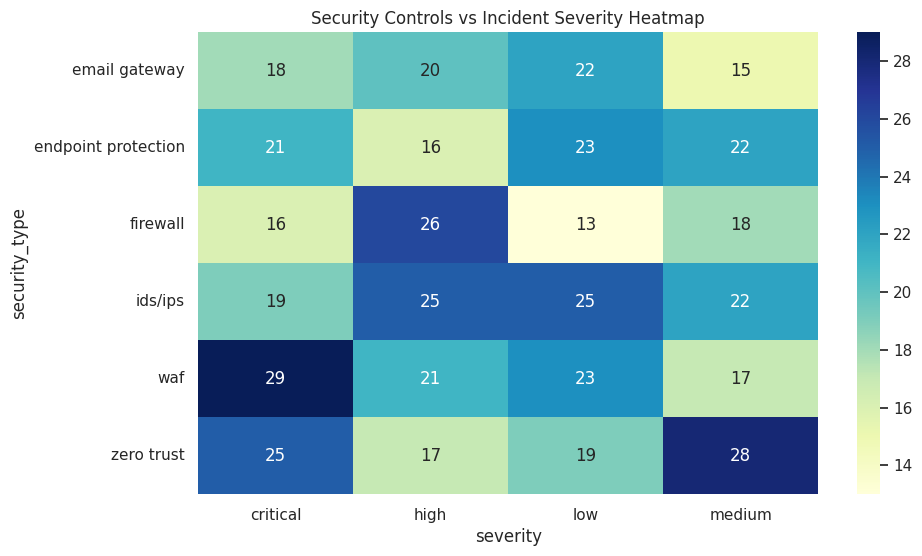

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(security_severity_ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Security Controls vs Incident Severity Heatmap')
plt.show()

# Task 12: Visualize Distribution of Attack Types

/tmp/ipython-input-4028010548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attack_type', order=order, palette='viridis')


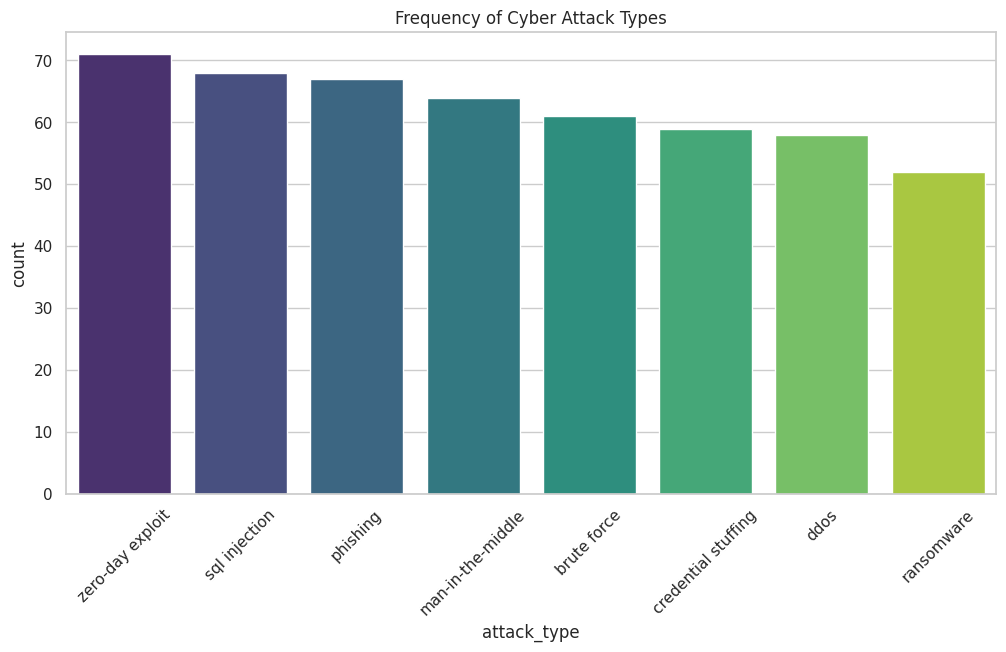

In [20]:
plt.figure(figsize=(12, 6))
order = df['attack_type'].value_counts().index
sns.countplot(data=df, x='attack_type', order=order, palette='viridis')
plt.title('Frequency of Cyber Attack Types')
plt.xticks(rotation=45)
plt.show()

# Task 13: Visualize Severity Distribution

/tmp/ipython-input-2612457947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='severity', order=severity_order, palette='magma')


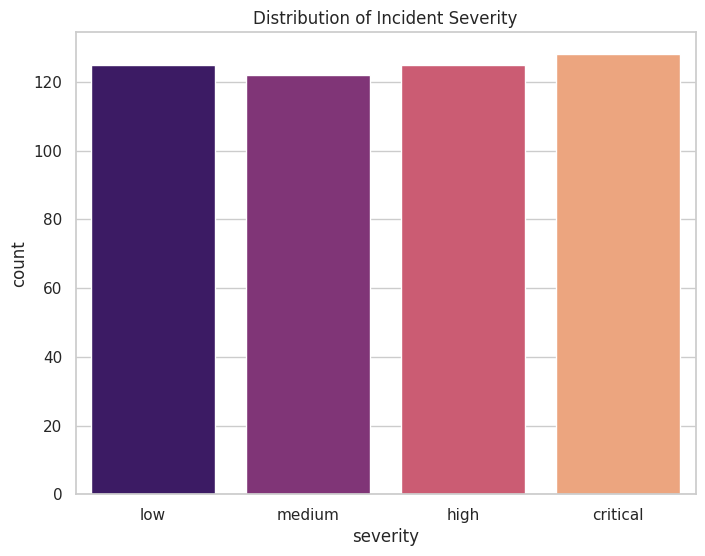

In [21]:
plt.figure(figsize=(8, 6))
# Define logical order for severity
severity_order = ['low', 'medium', 'high', 'critical']
sns.countplot(data=df, x='severity', order=severity_order, palette='magma')
plt.title('Distribution of Incident Severity')
plt.show()

# Task 14: Visualize Attacks by Attacker Location

/tmp/ipython-input-3512718738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attacker_location', order=top_10_locations, palette='Set2')


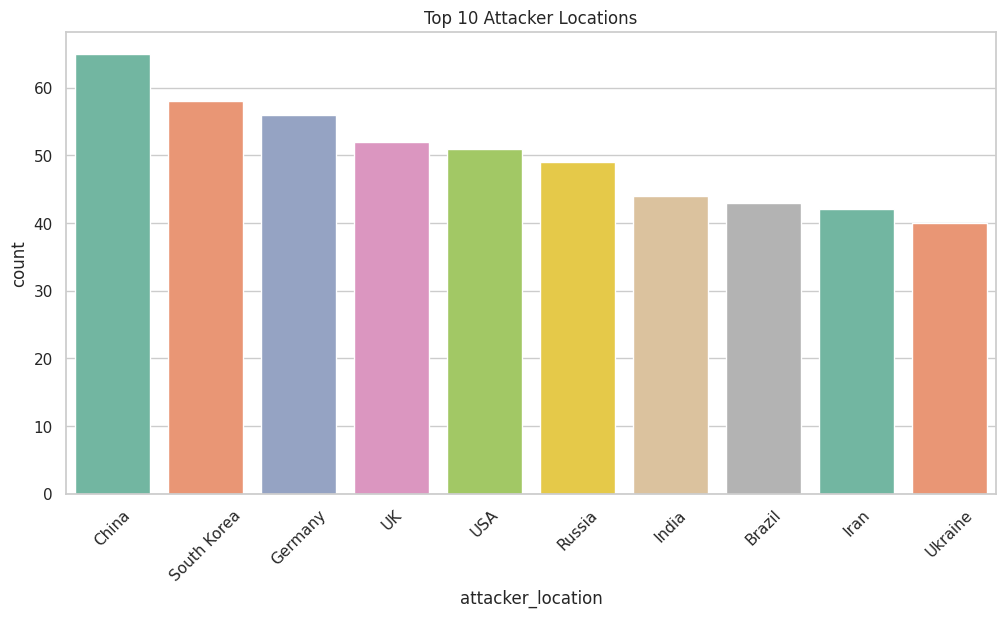

In [22]:
plt.figure(figsize=(12, 6))
top_10_locations = df['attacker_location'].value_counts().head(10).index
sns.countplot(data=df, x='attacker_location', order=top_10_locations, palette='Set2')
plt.title('Top 10 Attacker Locations')
plt.xticks(rotation=45)
plt.show()

# Task 15: Visualize Attack Type vs Severity (Stacked Bar Chart)

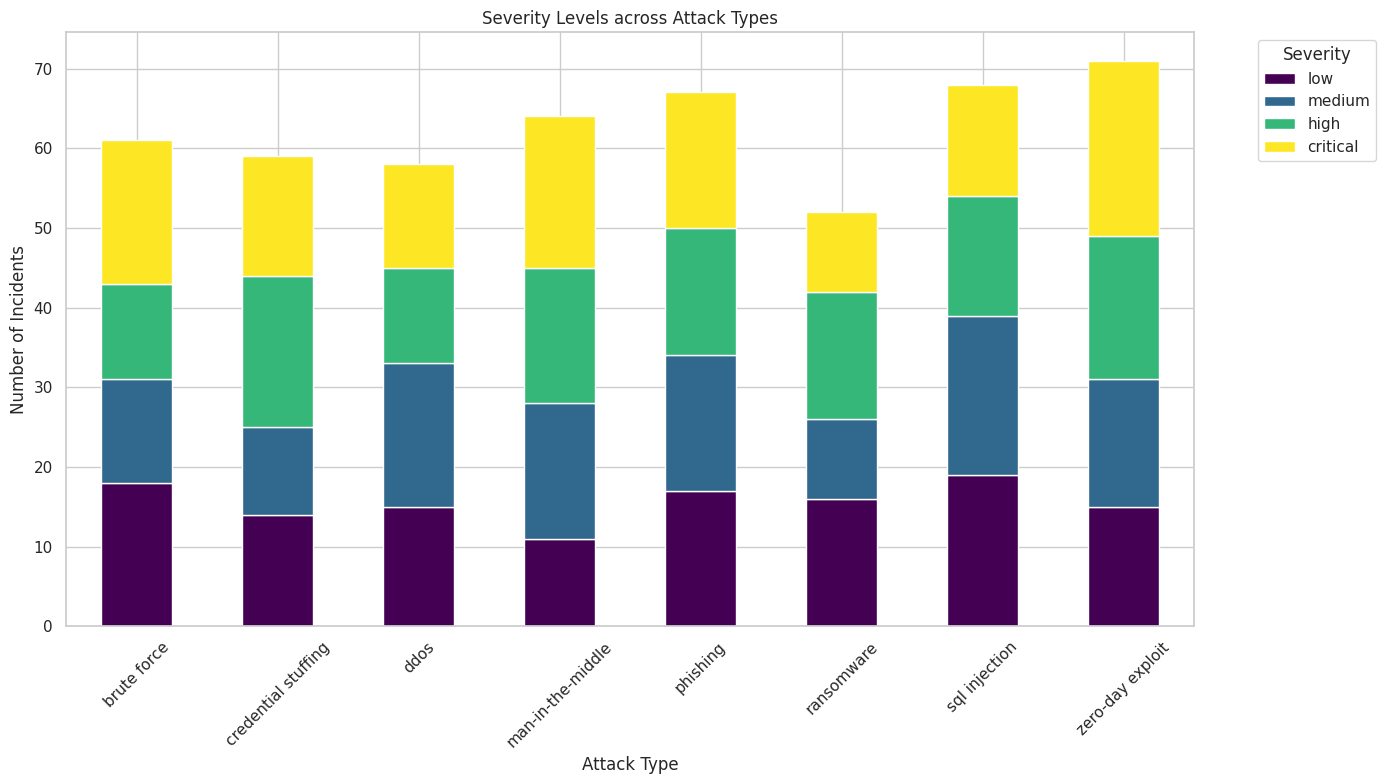

In [23]:
attack_severity_pivot = pd.crosstab(df['attack_type'], df['severity'])
# Reorder columns for logical progression
available_severities = [s for s in severity_order if s in attack_severity_pivot.columns]
attack_severity_pivot = attack_severity_pivot[available_severities]

attack_severity_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Severity Levels across Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()